In [1]:
import numpy as np
import gurobipy as gp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

gurobi_time_limit = 3600

## Q1

In [2]:
stocks_2019 = pd.read_csv('stocks2019.csv')
stocks_2020 = pd.read_csv('stocks2020.csv')

#Dropping NDX as it is not a Stock but the NASDAQ index itself
stocks_2019 = stocks_2019.drop('NDX',axis=1)
stocks_2020 = stocks_2020.drop('NDX',axis=1)

stocks_2019 = stocks_2019.set_index('X') #setting date column as index
stocks_2020 = stocks_2020.set_index('X')

#Computing Daily Returns for every stock
stocks_2019_shift = stocks_2019.shift(1)

#The first row will not have a return.
stocks_2019_shift=stocks_2019_shift[1:]
stocks_2019=stocks_2019[1:]


returns_dataframe = ((stocks_2019-stocks_2019_shift)/stocks_2019_shift)


#Matrix storing daily % returns for every stock
returns_dataframe.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,-0.060405,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2019-01-04,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,0.024278,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
2019-01-07,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,0.006288,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
2019-01-08,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,0.024396,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
2019-01-09,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,0.025340,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972


In [3]:
# Repeating the same task for 2020 data
#Computing Returns for every stock
stocks_2020_shift = stocks_2020.shift(1)

#The first row will not have a return.
stocks_2020_shift=stocks_2020_shift[1:]
stocks_2020=stocks_2020[1:]


returns_dataframe_2020 = ((stocks_2020-stocks_2020_shift)/stocks_2020_shift)


#Matrix storing daily % returns for every stock
returns_dataframe_2020.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
X,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,-0.017604,...,-0.021369,-0.017207,0.021095,0.009727,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
2020-01-06,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,-0.011749,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
2020-01-07,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,0.022751,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005034,0.020414,0.067698,-0.002077,0.022830
2020-01-08,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,0.009032,...,-0.012323,0.019400,0.004626,0.009207,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
2020-01-09,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,0.000000,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493


In [4]:
#Storing Nasdaq index values
nasdaq_2019 = pd.read_csv('stocks2019.csv')[['X','NDX']]
nasdaq_2020 = pd.read_csv('stocks2020.csv')[['X','NDX']]

nasdaq_2019 = nasdaq_2019.set_index('X') #setting date column as index
nasdaq_2020 = nasdaq_2020.set_index('X')

#Computing Returns for every stock
nasdaq_2019_shift = nasdaq_2019.shift(1)
nasdaq_2020_shift = nasdaq_2020.shift(1)

#The first row will not have a return.
nasdaq_2019_shift=nasdaq_2019_shift[1:]
nasdaq_2019=nasdaq_2019[1:]
nasdaq_2020_shift=nasdaq_2020_shift[1:]
nasdaq_2020=nasdaq_2020[1:]

#Storing daily returns of Nasdaq
nasdaq_returns_dataframe_2019 = ((nasdaq_2019-nasdaq_2019_shift)/nasdaq_2019_shift)
nasdaq_returns_dataframe_2020 = ((nasdaq_2020-nasdaq_2020_shift)/nasdaq_2020_shift)

In [5]:
corrM = returns_dataframe.corr() #creating correlation matrix

#Now storing most similar stocks for every stock
highest=[]
i=0
print()
for i in range(corrM.shape[1]):
    highest.append(corrM[corrM.columns.values[i]].idxmax())

corrM

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
ATVI,1.000000,0.399939,0.365376,0.223162,0.216280,0.433097,0.426777,0.467076,0.203956,0.329355,...,0.322906,0.128241,0.464850,0.316549,0.259679,0.218149,0.311659,0.303077,0.043389,0.249667
ADBE,0.399939,1.000000,0.452848,0.368928,0.363370,0.552125,0.540404,0.598237,0.291978,0.473815,...,0.360392,0.201151,0.711339,0.541243,0.402171,0.228106,0.650430,0.361516,0.207403,0.289497
AMD,0.365376,0.452848,1.000000,0.301831,0.344252,0.418861,0.417254,0.549302,0.151452,0.503733,...,0.332776,0.210623,0.498342,0.330900,0.272983,0.281950,0.407626,0.438892,0.017283,0.478010
ALXN,0.223162,0.368928,0.301831,1.000000,0.332433,0.315993,0.307698,0.363170,0.342022,0.317040,...,0.257143,0.408936,0.350581,0.191489,0.522423,0.192720,0.416396,0.289908,0.047947,0.200356
ALGN,0.216280,0.363370,0.344252,0.332433,1.000000,0.248747,0.250316,0.399281,0.264599,0.328280,...,0.175957,0.128559,0.360886,0.251855,0.334978,0.219595,0.308968,0.284407,0.088059,0.253934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.218149,0.228106,0.281950,0.192720,0.219595,0.232900,0.230603,0.288168,0.194490,0.347861,...,0.257049,0.145330,0.195475,0.126118,0.214585,1.000000,0.211641,0.296309,-0.130798,0.276643
WDAY,0.311659,0.650430,0.407626,0.416396,0.308968,0.379493,0.371826,0.424748,0.211712,0.351734,...,0.235045,0.269545,0.569672,0.401476,0.376047,0.211641,1.000000,0.315699,0.209240,0.254117
WDC,0.303077,0.361516,0.438892,0.289908,0.284407,0.328619,0.322110,0.419620,0.172623,0.602935,...,0.377215,0.126463,0.331916,0.308558,0.314773,0.296309,0.315699,1.000000,-0.076115,0.516958
XEL,0.043389,0.207403,0.017283,0.047947,0.088059,0.059930,0.052570,0.076724,0.137857,-0.047259,...,-0.172752,0.074686,0.280371,0.407770,0.191667,-0.130798,0.209240,-0.076115,1.000000,-0.117552


In [6]:
#Creating X Matrix
temp=np.zeros(corrM.shape[0])
for i in range(corrM.shape[0]):
    for j in range(len(corrM.columns.values)):
        if corrM.columns.values[j]==highest[i]:
            temp[i]=j

#this array will be used to create Xij matrix
X = np.zeros((corrM.shape[0],corrM.shape[1]))
for i in range(corrM.shape[0]):
    for j in range(corrM.shape[1]):
        if j==temp[i]:
            X[i,j]=1

#So, we have created the matrix to store Xij

In [7]:
corr_array = np.zeros(corrM.shape[0]*corrM.shape[1])
k=0
for i in range(corrM.shape[0]):
    for j in range(corrM.shape[1]):
        corr_array[k]=corrM.iloc[i,j]
        k=k+1

## Q2

**First we will solve the Integer Programming Problem. There are 100 Yj variables and 100*100 Xij variables**

In [8]:
#Initializing Objective Function
obj = np.append(corr_array,([0]*(corrM.shape[0])))

#Initializing Constraint Matrix
A = np.zeros((1+corrM.shape[0]+len(corr_array),corrM.shape[0]+len(corr_array)))


**First Constraint**

In [9]:
A[0,:] = np.append(([0]*len(corr_array)),([1]*(corrM.shape[0])))

k=1

**Second Constraint**

In [10]:
for i in range(X.shape[0]):
    A[k,i*X.shape[0]:(i+1)*X.shape[0]]=1
    k=k+1

**Third Constraint**

In [11]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        A[k,(i*X.shape[0])+j] = 1
        A[k,j+len(corr_array)] = -1
        k=k+1 

In [12]:
sense = np.append(['='],['=']*X.shape[0])
sense = np.append(sense,['<']*(len(A)-1-X.shape[0]))
b = np.append([5],[1]*X.shape[0])
b = np.append(b,[0]*(len(A)-1-X.shape[0]))

In [13]:
lpMod = gp.Model()
lpMod_x = lpMod.addMVar(len(corr_array)+corrM.shape[0],vtype=['B']*(len(corr_array)+corrM.shape[0]))
lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
lpMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
lpMod.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-14


In [14]:
lpMod_x.x

array([ 0., -0., -0., ..., -0.,  1., -0.])

In [15]:
lpMod.objVal

54.83990652229107

In [16]:
reshaped_X=lpMod_x.x[:len(corr_array)].reshape(X.shape[0],X.shape[1]) #reshaping matrix for readability
reshaped_y=lpMod_x.x[len(corr_array):]

In [17]:
itemindex = np.where(reshaped_y == 1) #storing index value for selected stocks
list_of_selected_stocks=corrM.index.values[itemindex].tolist()
print("So Selected Stocks are: ",list_of_selected_stocks)


#Storing the returns of only these stocks in a new dataframe
selected_stocks_returns = returns_dataframe[list_of_selected_stocks]
selected_stocks_returns_array = selected_stocks_returns.to_numpy()

selected_stocks_returns_2020 = returns_dataframe_2020[list_of_selected_stocks]
selected_stocks_returns_array_2020 = selected_stocks_returns_2020.to_numpy()

So Selected Stocks are:  ['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']


In [18]:
no_of_days_2019 = len(nasdaq_returns_dataframe_2019)
no_of_days_2020 = len(nasdaq_returns_dataframe_2020)

#initializing returns for Nasdaq (q)
q=np.array(nasdaq_returns_dataframe_2019['NDX'])

#for 2020 data
q_2020=np.array(nasdaq_returns_dataframe_2020['NDX'])

**Now we will formulate a Linear Program to calculate Portfolio Weights**

In [19]:
obj = np.append([1]*no_of_days_2019,[0]*len(list_of_selected_stocks))
A = np.zeros((2*(no_of_days_2019)+1,no_of_days_2019+len(list_of_selected_stocks)))
k=0
for i in range(no_of_days_2019):
    A[k,i]= 1
    A[k,no_of_days_2019:] = selected_stocks_returns_array[i]
    k=k+1
    A[k,i]= 1
    A[k,no_of_days_2019:] = -selected_stocks_returns_array[i]
    k=k+1
    
A[k,:] = np.append([0]*no_of_days_2019,[1]*len(list_of_selected_stocks))

sense = np.append(['>']*(2*no_of_days_2019),['='])

b=np.zeros(len(sense))
k=0
for i in range(no_of_days_2019):
    b[2*i] = q[i]
    k=k+1
    b[2*i+1] = -q[i]
    k=k+1        
b[k] = 1

In [20]:
lpMod = gp.Model()
lpMod_x = lpMod.addMVar(no_of_days_2019+len(list_of_selected_stocks))
lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
lpMod.optimize()

In [21]:
#We are only interested in the weights of the stocks
weights=lpMod_x.x[no_of_days_2019:]
weights

array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

Text(0.5, 0, 'Stocks Selected')

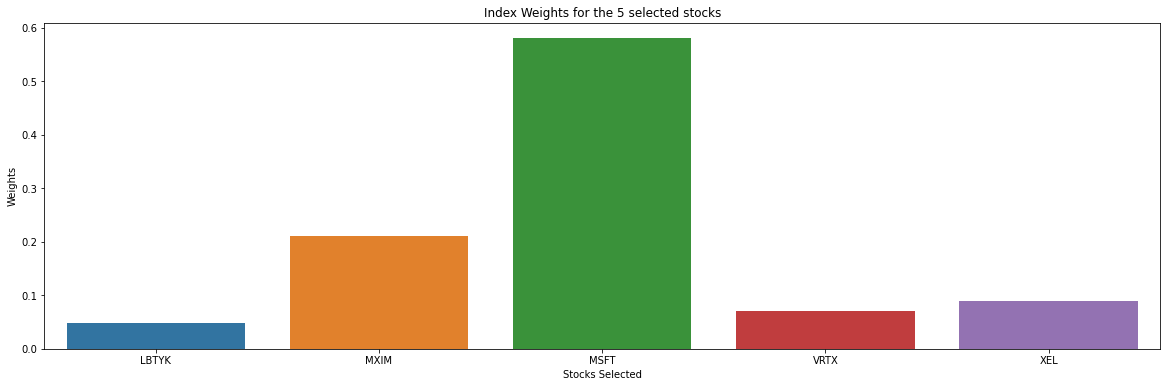

In [22]:
plt.figure(figsize = (20,6))
plt.title("Index Weights for the 5 selected stocks")
sn.barplot(x = list_of_selected_stocks , y = weights)
plt.ylabel("Weights")
plt.xlabel("Stocks Selected")

In [23]:
#Now we will calculate absolute deviation of index fund from NASDAQ for 2019
absolute_deviation_2019 = 0
for i in range(no_of_days_2019):
    wr = 0
    for j in range(len(list_of_selected_stocks)):
        wr = wr + (weights[j]*selected_stocks_returns_array[i][j])       
    s = abs(q[i] - wr) 
    absolute_deviation_2019 = absolute_deviation_2019 + s
    
print ("Absolute Deviation for year 2019 is:", absolute_deviation_2019)

#Now we will calculate absolute deviation of index fund from NASDAQ for 2020
absolute_deviation_2020 = 0
for i in range(no_of_days_2020):
    wr = 0
    for j in range(len(list_of_selected_stocks)):
        wr = wr + (weights[j]*selected_stocks_returns_array_2020[i][j])       
    s = abs(q_2020[i] - wr) 
    absolute_deviation_2020 = absolute_deviation_2020 + s
    
print ("\nAbsolute Deviation for year 2020 is:", absolute_deviation_2020)

Absolute Deviation for year 2019 is: 0.789178282463145

Absolute Deviation for year 2020 is: 0.8696699433741913


<AxesSubplot:title={'center':'Performance Evaluation on m=5'}, xlabel='Year', ylabel='Total Absolute Deviation'>

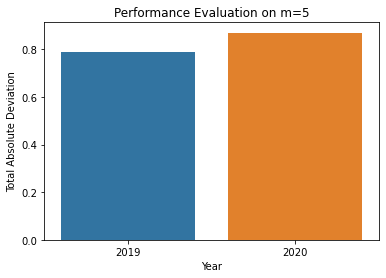

In [24]:
plt.title("Performance Evaluation on m=5")
plt.xlabel("Year")
plt.ylabel("Total Absolute Deviation")
sn.barplot(x = [2019,2020], y = [absolute_deviation_2019,absolute_deviation_2020])

Text(0, 0.5, 'Returns')

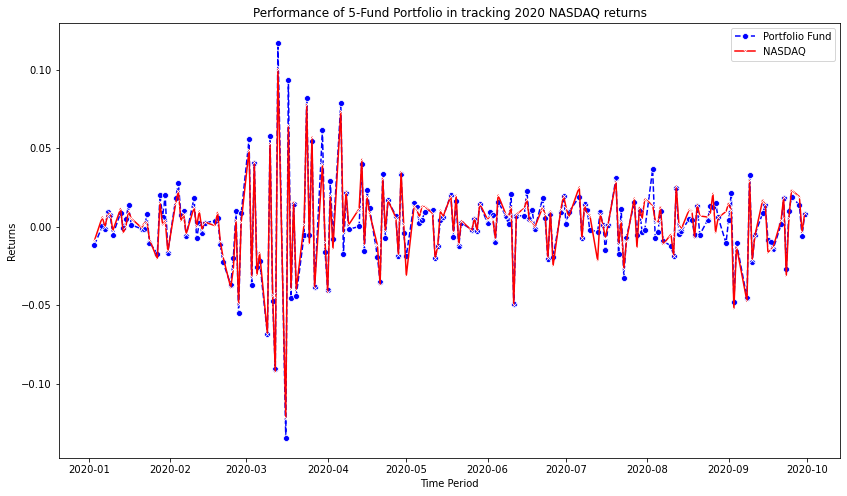

In [25]:
returns_timeline = pd.to_datetime(stocks_2020.index)
weighted_returns = []
#Computing weighted returns
for i in range(no_of_days_2020):
    wr = 0
    for j in range(len(list_of_selected_stocks)):
        wr = wr + (weights[j]*selected_stocks_returns_array_2020[i][j])       
    weighted_returns.append(wr)

plt.figure(figsize = (14,8))

#Plotting weighted returns from 2020 for selected stocks
sn.lineplot(x = returns_timeline, y = np.array(weighted_returns), marker = 'o', 
            linestyle = 'dashed', color = 'blue', label = 'Portfolio Fund')

#Plotting returns from 2020 for NASDAQ
sn.lineplot(x = returns_timeline, y = q_2020, marker = 'x',
             color = 'red', label = 'NASDAQ')

plt.title("Performance of 5-Fund Portfolio in tracking 2020 NASDAQ returns")
plt.xlabel('Time Period')
plt.ylabel('Returns')



As we can see, the 5 fund portfolio does a fairly decent job of tracking the daily returns of NASDAQ in the year 2020

## Q3
Now we will solve Q3

In [26]:
perf_2019 = []
perf_2020 = []
for m in range(10,110,10):
    print("For m=",m,":\n\n")
    obj = np.append(corr_array,([0]*(corrM.shape[0])))
    A = np.zeros((1+corrM.shape[0]+len(corr_array),corrM.shape[0]+len(corr_array)))
    A[0,:] = np.append(([0]*len(corr_array)),([1]*(corrM.shape[0])))

    k=1

    for i in range(X.shape[0]):
        A[k,i*X.shape[0]:(i+1)*X.shape[0]]=1
        k=k+1

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            A[k,(i*X.shape[0])+j] = 1
            A[k,j+len(corr_array)] = -1
            k=k+1  
    sense = np.append(['='],['=']*X.shape[0])
    sense = np.append(sense,['<']*(len(A)-1-X.shape[0]))
    b = np.append([m],[1]*X.shape[0])
    b = np.append(b,[0]*(len(A)-1-X.shape[0]))

    lpMod = gp.Model()
    lpMod_x = lpMod.addMVar(len(corr_array)+corrM.shape[0],vtype=['B']*(len(corr_array)+corrM.shape[0]))
    lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
    lpMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

    lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    lpMod.optimize()

    reshaped_X=lpMod_x.x[:len(corr_array)].reshape(X.shape[0],X.shape[1]) #reshaping matrix for readability
    reshaped_y=lpMod_x.x[len(corr_array):]

    itemindex = np.where(reshaped_y == 1) #storing index value for selected stocks
    list
    list_of_selected_stocks=corrM.index.values[itemindex].tolist()
    print("So Selected Stocks are: ",list_of_selected_stocks)

    #Storing the returns of only these stocks in a new dataframe
    selected_stocks_returns = returns_dataframe[list_of_selected_stocks]
    selected_stocks_returns_array = selected_stocks_returns.to_numpy()

    selected_stocks_returns_2020 = returns_dataframe_2020[list_of_selected_stocks]
    selected_stocks_returns_array_2020 = selected_stocks_returns_2020.to_numpy()

    no_of_days_2019 = len(nasdaq_returns_dataframe_2019)
    no_of_days_2020 = len(nasdaq_returns_dataframe_2020)

    #initializing returns for Nasdaq (q)
    q=np.array(nasdaq_returns_dataframe_2019['NDX'])

    #for 2020 data
    q_2020=np.array(nasdaq_returns_dataframe_2020['NDX'])

    #Now we will formulate a Linear Program
    obj = np.append([1]*no_of_days_2019,[0]*len(list_of_selected_stocks))
    A = np.zeros((2*(no_of_days_2019)+1,no_of_days_2019+len(list_of_selected_stocks)))
    k=0
    for i in range(no_of_days_2019):
        A[k,i]= 1
        A[k,no_of_days_2019:] = selected_stocks_returns_array[i]
        k=k+1
        A[k,i]= 1
        A[k,no_of_days_2019:] = -selected_stocks_returns_array[i]
        k=k+1
    A[k,:] = np.append([0]*no_of_days_2019,[1]*len(list_of_selected_stocks))

    sense = np.append(['>']*(2*no_of_days_2019),['='])

    b=np.zeros(len(sense))
    k=0
    for i in range(no_of_days_2019):
        b[2*i] = q[i]
        k=k+1
        b[2*i+1] = -q[i]
        k=k+1        
    b[k] = 1

    lpMod = gp.Model()
    lpMod_x = lpMod.addMVar(no_of_days_2019+len(list_of_selected_stocks))
    lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
    lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

    lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    lpMod.optimize()

    #We are only interested in the weights of the stocks
    weights=lpMod_x.x[no_of_days_2019:]
    print("Weights of stocks are:",weights)


    #Now we will calculate absolute deviation of index fund from NASDAQ for 2019
    absolute_deviation_2019 = 0
    for i in range(no_of_days_2019):
        wr = 0
        for j in range(len(list_of_selected_stocks)):
            wr = wr + (weights[j]*selected_stocks_returns_array[i][j])       
        s = abs(q[i] - wr) 
        absolute_deviation_2019 = absolute_deviation_2019 + s

    print ("\nAbsolute Deviation for year 2019 is:", absolute_deviation_2019)

    #Now we will calculate absolute deviation of index fund from NASDAQ for 2020
    absolute_deviation_2020 = 0
    for i in range(no_of_days_2020):
        wr = 0
        for j in range(len(list_of_selected_stocks)):
            wr = wr + (weights[j]*selected_stocks_returns_array_2020[i][j])       
        s = abs(q_2020[i] - wr) 
        absolute_deviation_2020 = absolute_deviation_2020 + s

    perf_2019.append(absolute_deviation_2019)
    perf_2020.append(absolute_deviation_2020)
    
    print ("\nAbsolute Deviation for year 2020 is:", absolute_deviation_2020)

    print("\n\n\n")
     
    

For m= 10 :


So Selected Stocks are:  ['ATVI', 'ALGN', 'BKNG', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'ROST', 'VRTX', 'XEL']
Weights of stocks are: [0.04113109 0.01220822 0.03947107 0.02150838 0.02807146 0.16324424
 0.48152712 0.08980658 0.05700025 0.06603159]

Absolute Deviation for year 2019 is: 0.6865330111458107

Absolute Deviation for year 2020 is: 0.8313165184500475




For m= 20 :


So Selected Stocks are:  ['ATVI', 'ALGN', 'GOOGL', 'ANSS', 'ADP', 'BIIB', 'BKNG', 'CMCSA', 'DLTR', 'JD', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'MRNA', 'PCAR', 'PDD', 'ULTA', 'VRTX', 'XEL']
Weights of stocks are: [0.01739277 0.02153427 0.18600136 0.06718136 0.03085371 0.00653493
 0.03024358 0.04730223 0.02007678 0.04482793 0.02686198 0.00691822
 0.11389751 0.2578934  0.00362052 0.03623552 0.01109768 0.00955687
 0.02311798 0.03885141]

Absolute Deviation for year 2019 is: 0.47373603379845963

Absolute Deviation for year 2020 is: 0.6825726084782863




For m= 30 :


So Selected Stocks are:  ['ATVI', 'ADBE', 'GOOGL'

In [27]:
performance_df = pd.DataFrame(data=[range(10,110,10),perf_2019, perf_2020]).T
performance_df.rename(columns={0: 'm', 1: 'Performance on 2019 Data', 2: 'Performance on 2020 Data'}, inplace=True)
performance_df=performance_df.set_index('m')
print("Absolute Deviation of Portfolio Fund with NASDAQ for 2019 and 2020 for various values of m:\n")
performance_df

Absolute Deviation of Portfolio Fund with NASDAQ for 2019 and 2020 for various values of m:



,Performance on 2019 Data,Performance on 2020 Data
m,,
10.0,0.686533,0.831317
20.0,0.473736,0.682573
30.0,0.418015,0.549085
40.0,0.370517,0.587312
50.0,0.332540,0.581148
60.0,0.344890,0.819424
70.0,0.169824,0.402497
80.0,0.147683,0.386431
90.0,0.053779,0.247582


Text(0, 0.5, 'Total Absolute Deviation')

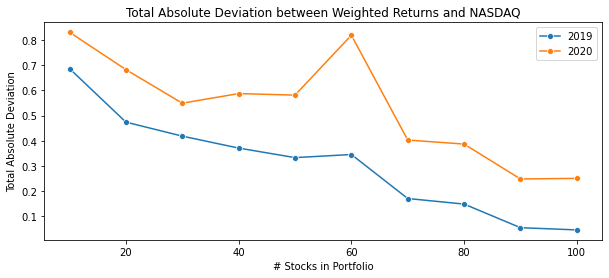

In [28]:
perf_2019 = np.array(perf_2019)
perf_2020 = np.array(perf_2020)

plt.figure(figsize = (10,4))
sn.lineplot(x = range(10,110,10), y= perf_2019, label = "2019", marker = "o")
sn.lineplot(x = range(10,110,10), y= perf_2020, label = "2020", marker = "o" )
plt.title("Total Absolute Deviation between Weighted Returns and NASDAQ")
plt.xlabel("# Stocks in Portfolio")
plt.ylabel("Total Absolute Deviation")

## Q4
Now we will reformulate this problem as an MIP 

In [29]:
sizes=np.append([5],range(10,110,10))
M=1 #Big M Value
perf_2019 = []
perf_2020 = []

for m in sizes:
    print("\n\nFor m=",m)
    
    obj = np.append([1]*no_of_days_2019,[0]*X.shape[0])
    obj= np.append(obj,[0]*X.shape[0])
    A = np.zeros((2*(no_of_days_2019)+2+(X.shape[0]),no_of_days_2019+(2*X.shape[0])))
    k=0
    for i in range(no_of_days_2019):
        A[k,i]= 1
        A[k,no_of_days_2019:no_of_days_2019+X.shape[0]] = np.array(returns_dataframe.iloc[i])
        k=k+1
        A[k,i]= 1
        A[k,no_of_days_2019:no_of_days_2019+X.shape[0]] = -np.array(returns_dataframe.iloc[i])
        k=k+1

    A[k,:no_of_days_2019] = np.array([0]*no_of_days_2019)
    A[k,no_of_days_2019:no_of_days_2019+X.shape[0]] = np.array([1]*X.shape[0])
    A[k,no_of_days_2019+X.shape[0]:] = np.array([0]*X.shape[0])
    k=k+1

    for i in range(X.shape[0]):
        A[k,no_of_days_2019+i] = 1
        A[k,no_of_days_2019+X.shape[0]+i] = -M
        k=k+1

    A[k,no_of_days_2019+X.shape[0]:] = 1

    sense = np.append(['>']*(2*no_of_days_2019),['='])
    sense = np.append(sense,['<']*X.shape[0])
    sense = np.append(sense,['='])

    b=np.zeros(len(sense))
    k=0
    for i in range(no_of_days_2019):
        b[2*i] = q[i]
        k=k+1
        b[2*i+1] = -q[i]
        k=k+1        
    b[k] = 1
    k=k+1

    for i in range(X.shape[0]):
        b[k] = 0
        k=k+1

    b[k] = m

    vtype = ['C']*(no_of_days_2019+(X.shape[0])) + ['B']*X.shape[0]

    lpMod = gp.Model()
    lpMod_x = lpMod.addMVar(no_of_days_2019+(2*X.shape[0]),vtype=vtype)
    lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
    lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

    lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    lpMod.setParam('TimeLimit', gurobi_time_limit) #Setting 1 hour time limit
    lpMod.optimize()

    #We are only interested in the weights of the stocks
    weights=lpMod_x.x[no_of_days_2019:no_of_days_2019+X.shape[0]]

    y = lpMod_x.x[no_of_days_2019+X.shape[0]:]

    itemindex = np.where(y == 1) #storing index value for selected stocks
    list_of_selected_stocks=corrM.index.values[itemindex].tolist()
    print("So Selected Stocks are: ",list_of_selected_stocks)
    weights = weights[itemindex]
    print("\nWeights are:",weights)

    #Now we will calculate absolute deviation of index fund from NASDAQ for 2019
    absolute_deviation_2019 = 0
    for i in range(no_of_days_2019):
        wr = 0
        for j in range(len(list_of_selected_stocks)):
            wr = wr + (weights[j]*selected_stocks_returns_array[i][j])       
        s = abs(q[i] - wr) 
        absolute_deviation_2019 = absolute_deviation_2019 + s

    print ("Absolute Deviation for year 2019 is:", absolute_deviation_2019)

    #Now we will calculate absolute deviation of index fund from NASDAQ for 2020
    absolute_deviation_2020 = 0
    for i in range(no_of_days_2020):
        wr = 0
        for j in range(len(list_of_selected_stocks)):
            wr = wr + (weights[j]*selected_stocks_returns_array_2020[i][j])       
        s = abs(q_2020[i] - wr) 
        absolute_deviation_2020 = absolute_deviation_2020 + s

    print ("\nAbsolute Deviation for year 2020 is:", absolute_deviation_2020)
    
    perf_2019.append(absolute_deviation_2019)
    perf_2020.append(absolute_deviation_2020)



For m= 5
So Selected Stocks are:  ['AMZN', 'ADI', 'AAPL', 'MSFT', 'MDLZ']

Weights are: [0.2501226  0.11375807 0.19169221 0.28986928 0.15455784]
Absolute Deviation for year 2019 is: 2.0926900691442296

Absolute Deviation for year 2020 is: 1.4442401722955305


For m= 10
So Selected Stocks are:  ['GOOG', 'AMZN', 'AMGN', 'AAPL', 'CSCO', 'FB', 'MSFT', 'MDLZ', 'PCAR', 'TXN']

Weights are: [0.09301978 0.13417841 0.06723853 0.12327247 0.05587908 0.07429341
 0.21106213 0.06725175 0.06871175 0.10509269]
Absolute Deviation for year 2019 is: 0.9858532720872449

Absolute Deviation for year 2020 is: 0.7534921243111452


For m= 20
So Selected Stocks are:  ['GOOGL', 'AMZN', 'AMGN', 'AAPL', 'AVGO', 'CSCO', 'CTXS', 'CMCSA', 'FB', 'GILD', 'INTC', 'KLAC', 'MU', 'MSFT', 'MDLZ', 'NFLX', 'PCAR', 'PAYX', 'PYPL', 'XLNX']

Weights are: [0.10016272 0.09354245 0.04117396 0.10945948 0.02545726 0.04209847
 0.03284935 0.03285257 0.05594678 0.02701822 0.0405431  0.02477619
 0.02188364 0.12933957 0.04688015 0.02811

In [ ]:
performance_df = pd.DataFrame(data=[sizes,perf_2019, perf_2020]).T
performance_df.rename(columns={0: 'm', 1: 'Performance on 2019 Data', 2: 'Performance on 2020 Data'}, inplace=True)
performance_df=performance_df.set_index('m')
print("Absolute Deviation of Portfolio Fund with NASDAQ for 2019 and 2020 for various values of m:\n")
performance_df

In [ ]:
perf_2019 = np.array(perf_2019)
perf_2020 = np.array(perf_2020)

plt.figure(figsize = (10,4))
sn.lineplot(x = sizes, y= perf_2019, label = "2019", marker = "o")
sn.lineplot(x = sizes, y= perf_2020, label = "2020", marker = "o" )
plt.title("Total Absolute Deviation between Weighted Returns and NASDAQ")
plt.xlabel("# Stocks in Portfolio")
plt.ylabel("Total Absolute Deviation")